# **1. 필요한 라이브러리 import**

In [486]:
import numpy as np
import pandas as pd

# for data visulization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2)

import missingno as msno

#for ignoring warning
import warnings
warnings.filterwarnings('ignore')

# **2. 데이터 불러오기**

In [487]:
train = pd.read_csv("../input/4w-wine-quality/winequality-combined-training.csv", sep = ',')
test = pd.read_csv("../input/4w-wine-quality/winequality-combined-testing.csv", sep = ',')
y_test = pd.read_csv('../input/y-test/winequality-combined-sample.csv', sep = ',')

In [488]:
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,0
1,1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,0
2,2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0
3,3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,0
4,4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,0


# + 데이터 전처리

null 값 X -> 비교적 다루기 편한 데이터임.

1. id: index - 필요없는 속성

2~12는 와인의 데이터들이다. 모두 연속형 변수임. 
(출처: https://blog.naver.com/boss507104/222027994481)

    2. fixed acidity : 고정 산도
    3. volatile acidity : 휘발성 산도
    4. citric acid : 시트르산
    5. residual sugar : 잔류 당분
    6. chlorides :염화물
    7. free sulfur dioxide : 자유 이산화황
    8. total sulfur dioxide : 총 이산화황
    9. density : 밀도
    10. pH : 산도
    11. sulphates : 황산염
    12. alcohol : 알코올

13. type: 품종에 따라 white wine = 0, red wine = 1의 값을 가짐.
     
     -> 의사결정 트리는 지도학습이므로 레이블을 지우지 않는다.
     -> test 셋은 type 속성이 없다.

In [489]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    5097 non-null   int64  
 1   fixed acidity         5097 non-null   float64
 2   volatile acidity      5097 non-null   float64
 3   citric acid           5097 non-null   float64
 4   residual sugar        5097 non-null   float64
 5   chlorides             5097 non-null   float64
 6   free sulfur dioxide   5097 non-null   float64
 7   total sulfur dioxide  5097 non-null   float64
 8   density               5097 non-null   float64
 9   pH                    5097 non-null   float64
 10  sulphates             5097 non-null   float64
 11  alcohol               5097 non-null   float64
 12  type                  5097 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 517.8 KB


In [490]:
train.type.value_counts()

0    3898
1    1199
Name: type, dtype: int64

In [491]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1400 non-null   int64  
 1   fixed acidity         1400 non-null   float64
 2   volatile acidity      1400 non-null   float64
 3   citric acid           1400 non-null   float64
 4   residual sugar        1400 non-null   float64
 5   chlorides             1400 non-null   float64
 6   free sulfur dioxide   1400 non-null   float64
 7   total sulfur dioxide  1400 non-null   float64
 8   density               1400 non-null   float64
 9   pH                    1400 non-null   float64
 10  sulphates             1400 non-null   float64
 11  alcohol               1400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 131.4 KB


In [492]:
# 필요없는 속성 지우기(train_version)
train.drop('Id', axis=1, inplace=True)

train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,0
1,5.0,0.270,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,0
2,8.0,0.160,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0
3,5.8,0.280,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,0
4,7.1,0.140,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5092,6.0,0.420,0.19,2.0,0.075,22.0,47.0,0.99522,3.39,0.78,10.0,1
5093,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,1
5094,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,1
5095,9.0,0.470,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,1


In [493]:
# 필요없는 속성 지우기(train_version)
test.drop('Id', axis=1, inplace=True)

test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.180,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,7.6,0.260,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,7.0,0.270,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,7.0,0.240,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,11.1,0.390,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1395,6.8,0.320,0.37,3.4,0.023,19.0,87.0,0.99020,3.14,0.53,12.7
1396,5.6,0.235,0.29,1.2,0.047,33.0,127.0,0.99100,3.34,0.50,11.0
1397,6.7,0.270,0.31,15.7,0.036,44.0,179.0,0.99790,3.26,0.56,9.6
1398,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6


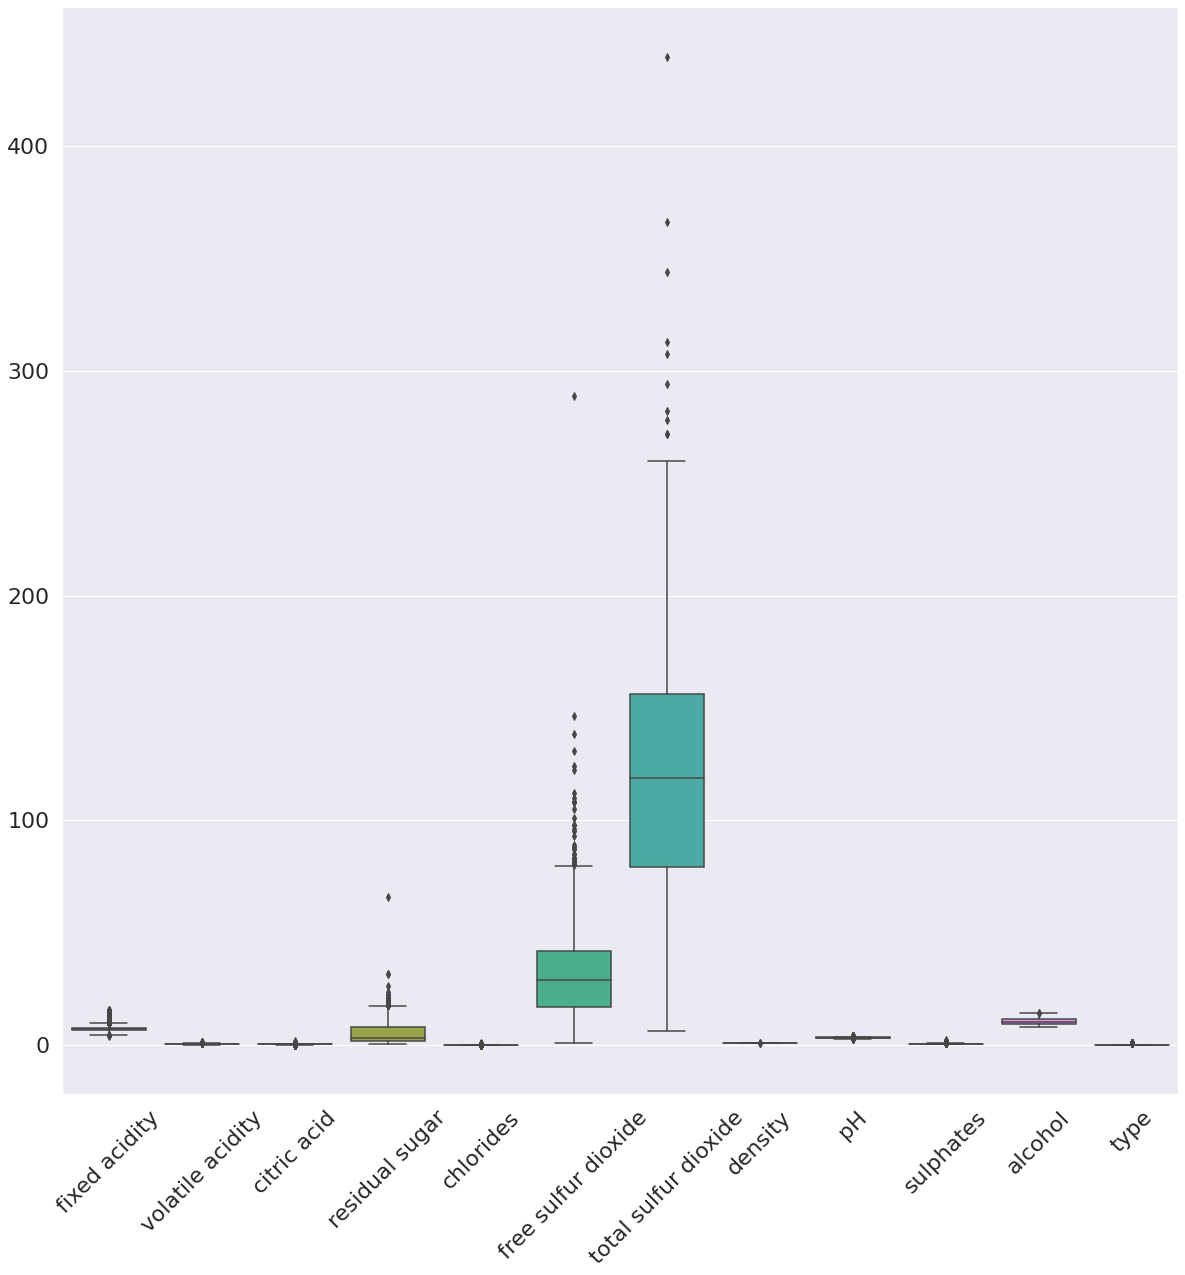

In [494]:
plt.figure(figsize=(20,20)) #크기 조절

plt.xticks(rotation=45) #font 기울기

sns.boxplot(data = train)

plt.show()

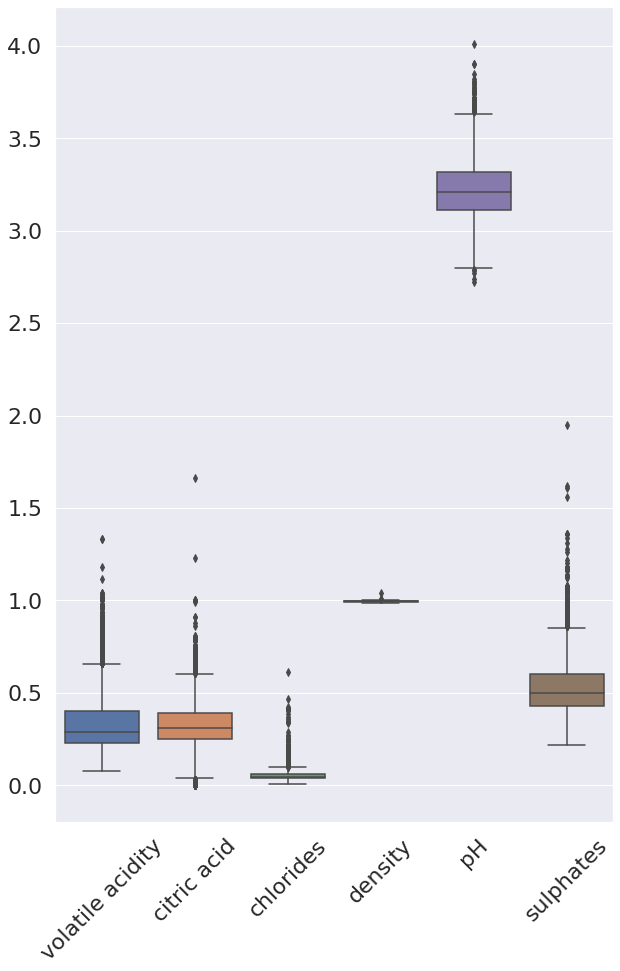

In [495]:
# 상대적으로 작은 값들(값의 max < 10)끼리 다시 boxplot으로 시각화해보자.
# because 상대적으로 큰 값 때문에 직관적으로 알아보기 어렵다. 별 다른 이유는 없음.
plt.figure(figsize=(10,15)) #크기 조절
plt.xticks(rotation=45) #font 기울기
sns.set(font_scale = 1)

sns.boxplot(data = train[['volatile acidity', 'citric acid', 'chlorides', 
                          'density', 'pH', 'sulphates']])
plt.show()

In [496]:
# 타이타닉처럼 0과 1의 값을 만든다.
# 엔트로피 낮을수록 깔끔한 상태임. 엔트로피가 점점 낮아진다.
# 유명한 알고리즘 ID3 : information gain이 가장 높은 것 부터 속성을 잡는다.
# 엔트로피 : 불확실성의 정도
# 위로 올라갈수록 엔트로피가 낮은것

# **3. decision tree 만들기

# **# step 1) tree 구축**

In [497]:
# 독립변수 : x_train/ x_test, 종속변수 : y_train
# (test_set에는 'type' 속성이 없다.)

y_train = train['type']
x_train = train.drop(['type'], axis=1, inplace = False)

In [498]:
# tree모듈에서 DataFrame 클래스의 데이터는 value error가 뜸
# 현재 class인 DataFrame에서 행렬numpy로 변환
x_train = x_train.values
y_train = y_train.values

In [499]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5


In [500]:
x_test = test.values

# **(1) gini 계수를 활용한 모델

# **# step 1) model 구축**

In [501]:
# for decision tree module
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

# **# step 2) test set으로 예측 후 정확도 check**

In [502]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1])

**#value_counts()로 값을 파악하기 위해서 다시 class를 DataFrame으로 변환**

In [503]:
pred = model.predict(x_test)

pred = pd.DataFrame(pred.reshape(1400,1))
#numpy의 크기를 1400,1400으로 인식해서 error가 뜸 -> reshape를 통해 해결

In [504]:
pred.value_counts()

0    1014
1     386
dtype: int64

In [505]:
y_test.head()

,Id,type
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [506]:
y_test.drop('Id', axis = 1, inplace = True)

In [507]:
# 정확도 측정
# (pred == y_test).mean()
# error : Can only compare identically-labeled DataFrame objects로 체크 못함.

# **# step 3) tree visualization**
+ 19년 기준_기존에 바로 트리를 시각화할 수 있는 함수가 있었는데 현재 없음 -> 직접 트리를 시각화해야한다. https://teddylee777.github.io/visualization/Decision-Tree%EA%B0%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%B6%84%ED%95%A0%ED%96%88%EB%8A%94%EC%A7%80-%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0(graphviz) & https://www.youtube.com/watch?v=Nah4Sx-S57Y 를 참고했습니다.

In [508]:
feature_names = train.columns
feature_names = np.delete(feature_names, -1) #delete 'type' feature

feature_names

# x_train.columns 확인한 결과, type 속성이 사라지지 않았습니다.
# info, head 다른 함수로 볼 때는 type이 사라져 있었는데..
# 원인을 못 찾아서 차선책으로 위의 방법으로 했습니다.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [509]:
import graphviz

dot_data = tree.export_graphviz(model, out_file = None,
                                feature_names = feature_names,
                               class_names = ['White', 'Red'],
                               filled = True, rounded = True,
                               special_characters = True) #특수문자

graph = graphviz.Source(dot_data)

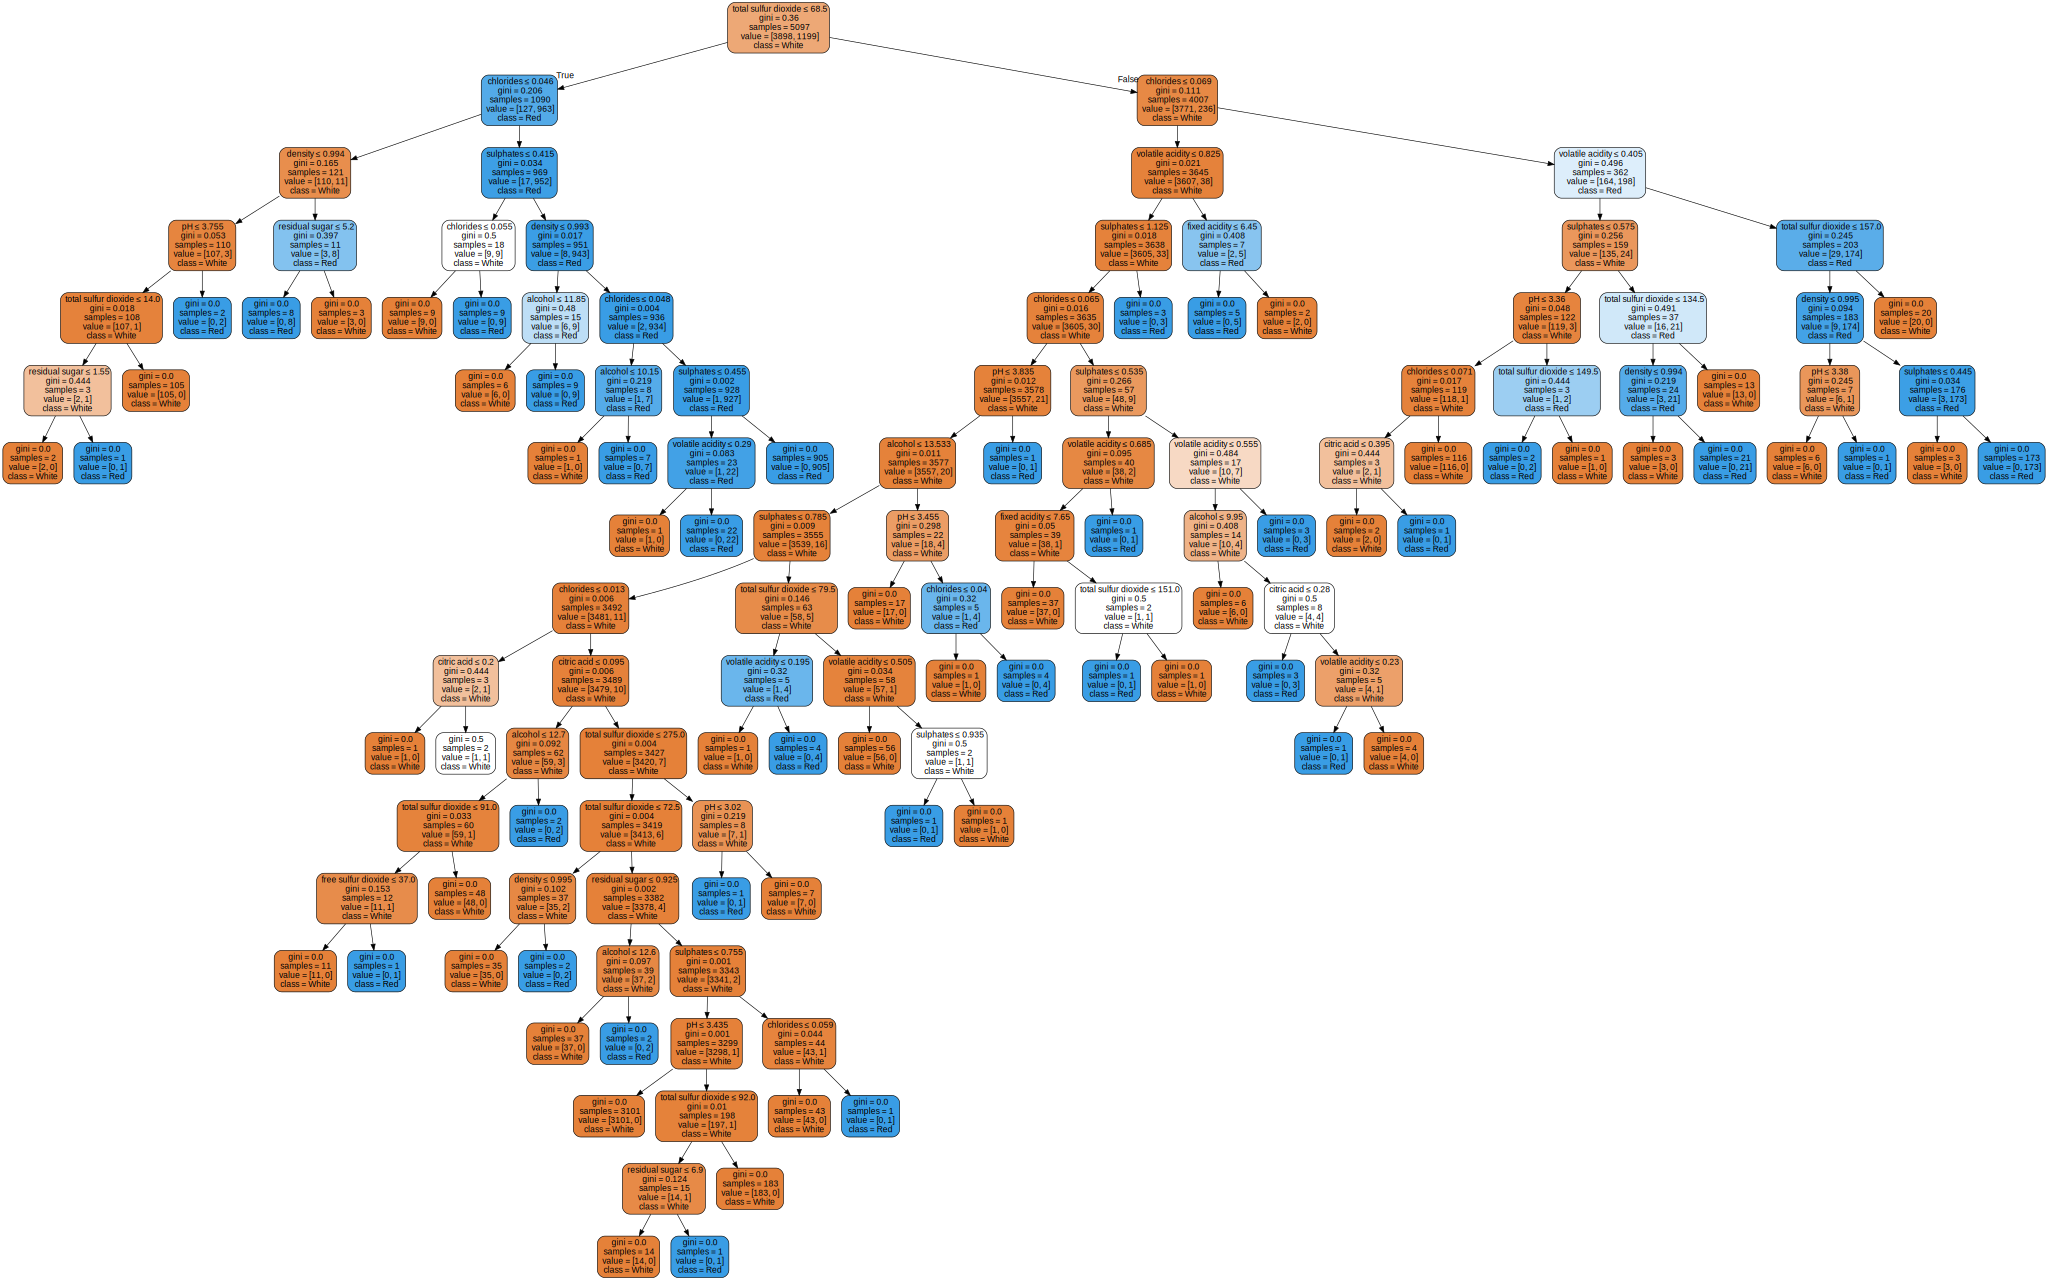

In [510]:
graph

# **(2) entropy를 활용한 모델

In [511]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy')
model2 = model2.fit(x_train, y_train)

In [512]:
dot_data2 = tree.export_graphviz(model2, out_file = None,
                                feature_names = feature_names,
                               class_names = ['White', 'Red'],
                               filled = True, rounded = True,
                               special_characters = True) #특수문자

graph2 = graphviz.Source(dot_data2)

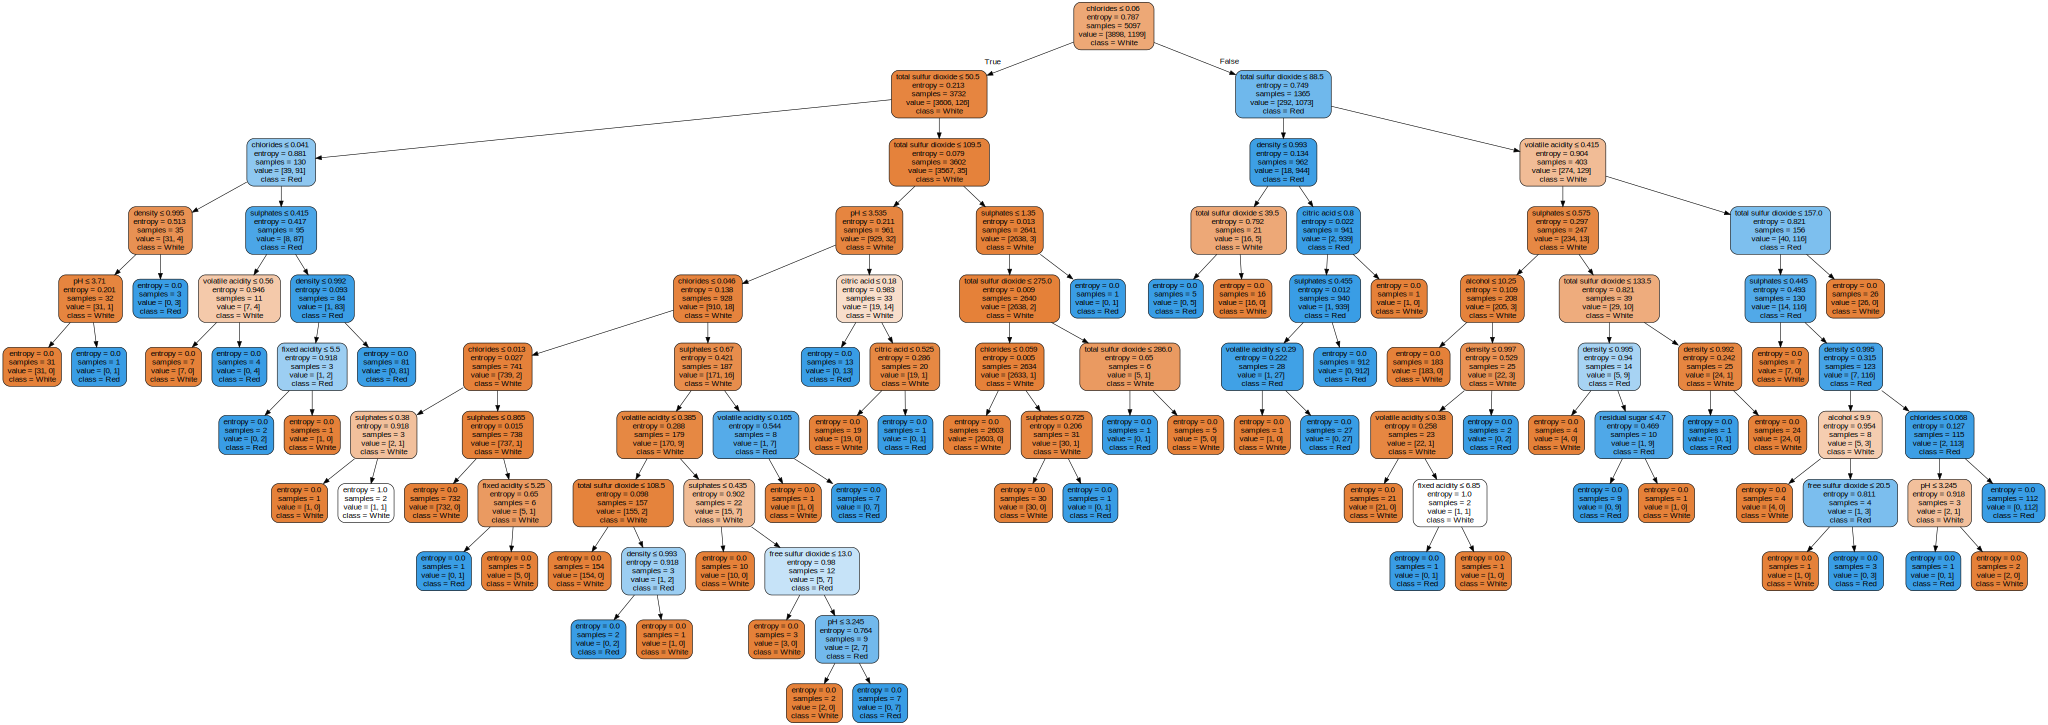

In [513]:
graph2

# **(3) 프루닝 for keeping from 과적합

표현하고 싶은 최대 depth를 설정하는 것임.

In [514]:
model3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # 3세대까지 보겠다.
model3 = model3.fit(x_train, y_train)

In [515]:
dot_data3 = tree.export_graphviz(model3, out_file = None,
                                feature_names = feature_names,
                               class_names = ['White', 'Red'],
                               filled = True, rounded = True,
                               special_characters = True) #특수문자

graph3 = graphviz.Source(dot_data3)

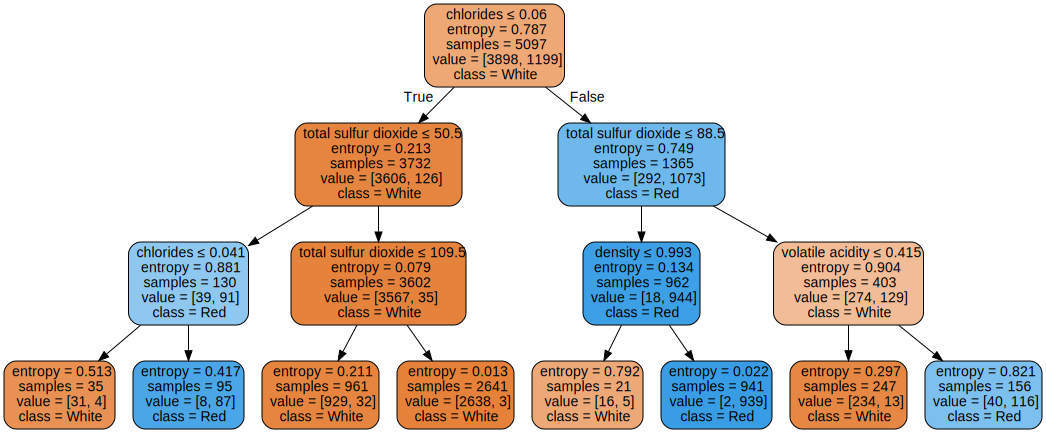

In [516]:
graph3

# **# step 4) 오차행렬 구하기**

https://blog.naver.com/simoon3568/222221240555 참고함

In [517]:
y_test.value_counts()

type
0       1400
dtype: int64

In [518]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, model.predict(x_test))

cm1

array([[1014,  386],
       [   0,    0]])

In [519]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, model2.predict(x_test))
cm2

array([[1016,  384],
       [   0,    0]])

In [523]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, model3.predict(x_test))
cm3

array([[1010,  390],
       [   0,    0]])

# + 정밀도, 재현율, F1점수로 전체적으로 model의 성능을 평가

In [527]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(x_test), y_test, target_names=['White', 'Red']))

              precision    recall  f1-score   support

       White       0.72      1.00      0.84      1014
         Red       0.00      0.00      0.00       386

    accuracy                           0.72      1400
   macro avg       0.36      0.50      0.42      1400
weighted avg       0.52      0.72      0.61      1400



In [528]:
from sklearn.metrics import classification_report

print(classification_report(model2.predict(x_test), y_test, target_names=['White', 'Red']))

              precision    recall  f1-score   support

       White       0.73      1.00      0.84      1016
         Red       0.00      0.00      0.00       384

    accuracy                           0.73      1400
   macro avg       0.36      0.50      0.42      1400
weighted avg       0.53      0.73      0.61      1400



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(model3.predict(x_test), y_test, target_names=['White', 'Red']))